Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
!pip install kaggle


In [ ]:
#Uploading kaggle.json to Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olagunjuamina","key":"426df2d82f84305b9c4b19adcd91acea"}'}

In [ ]:
#move kaggle.json into the kaggle folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Data Collection

In [ ]:
#downloading titanic competition dataset
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 111MB/s]


In [ ]:
#unzip the dataset
!unzip -o titanic.zip -d titanic

Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


In [ ]:
#creating pandas dataframe
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [ ]:
#displaying the first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis


In [ ]:
#display the number of rows and columns
train_df.shape


(891, 12)

In [ ]:
#display statistical measures
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#display number of survivors
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


survived
yes---> 1
no----> 0

<Axes: xlabel='Survived', ylabel='count'>

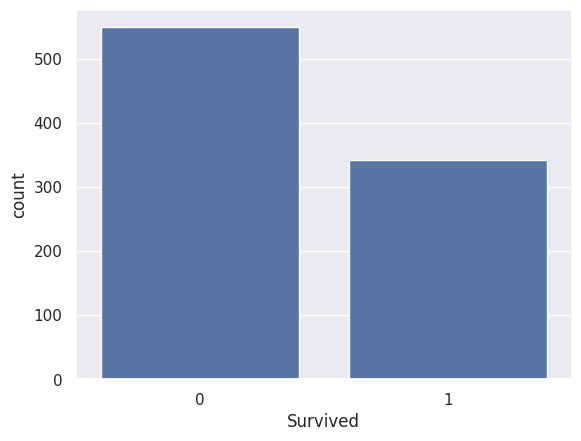

In [ ]:
#visual representation of survival
sns.set()
sns.countplot(x='Survived', data=train_df)

In [ ]:
#display dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#number of null values in each column
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data cleaning(Handling Missing Values)

In [ ]:
#dropping the 'Cabin' column from the dataframe
train_df = train_df.drop(columns='Cabin', axis=1)

In [ ]:
#filling the missing values in the 'Age' column with the mean of the 'Age' column
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

/tmp/ipython-input-1563713046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


In [ ]:
#finding the mode value for the 'Embarked' column

In [ ]:
#filling the missingg values in the 'Embarked' column with its mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3946345457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


Feature Engineering

In [ ]:
#Family features into a column
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['Family Size']==1).astype(int)


In [ ]:
#creating Age bins using the Age column
bins= [0,12,18,40,60,100]
labels = ['Child','Teenager','Adult','Middle Age','Senior']
train_df['Age Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,IsAlone,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Adult


IsAlone---> 0 = No, 1 = Yes

Further Data Analysis


In [ ]:
#comparing the survival rates IsAlone,Sex,Age,Pclass
print(train_df.groupby(['IsAlone','Sex','Age Group','Pclass'])['Survived'].mean())

IsAlone  Sex     Age Group   Pclass
0        female  Child       1         0.000000
                             2         1.000000
                             3         0.454545
                 Teenager    1         1.000000
                             2         1.000000
                             3         0.444444
                 Adult       1         0.969697
                             2         0.920000
                             3         0.456522
                 Middle Age  1         1.000000
                             2         0.857143
                             3         0.000000
                 Senior      1         1.000000
                             2              NaN
                             3              NaN
         male    Child       1         1.000000
                             2         1.000000
                             3         0.375000
                 Teenager    1         0.500000
                             2              NaN
    

/tmp/ipython-input-1775660902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(['IsAlone','Sex','Age Group','Pclass'])['Survived'].mean())


<Figure size 1000x600 with 0 Axes>

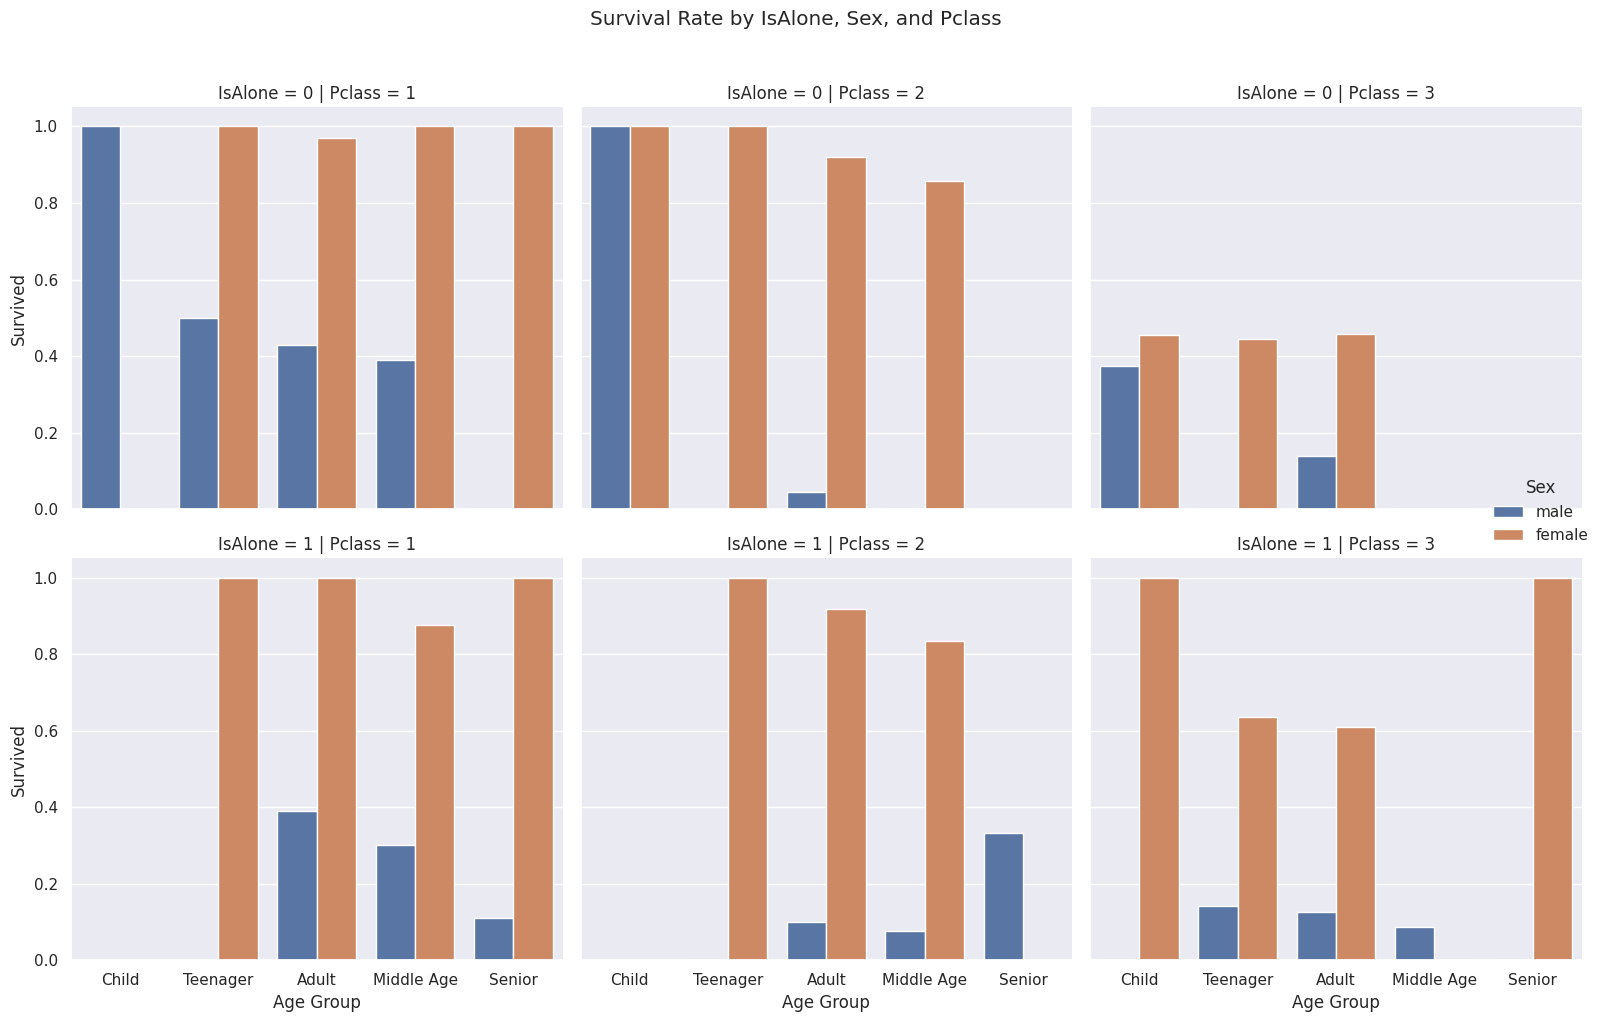

In [ ]:
#visualizing
# creating bar chart comparing survival of 'IsAlone','Sex','Age Group','Pclass'

plt.figure(figsize=(10, 6))
sns.catplot(x='Age Group', y='Survived', hue='Sex', col='Pclass', row='IsAlone', kind='bar', errorbar=None, estimator='mean', data=train_df)
plt.suptitle('Survival Rate by IsAlone, Sex, and Pclass', y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-329407316.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train_df.pivot_table(index=['IsAlone','Sex','Age Group'],


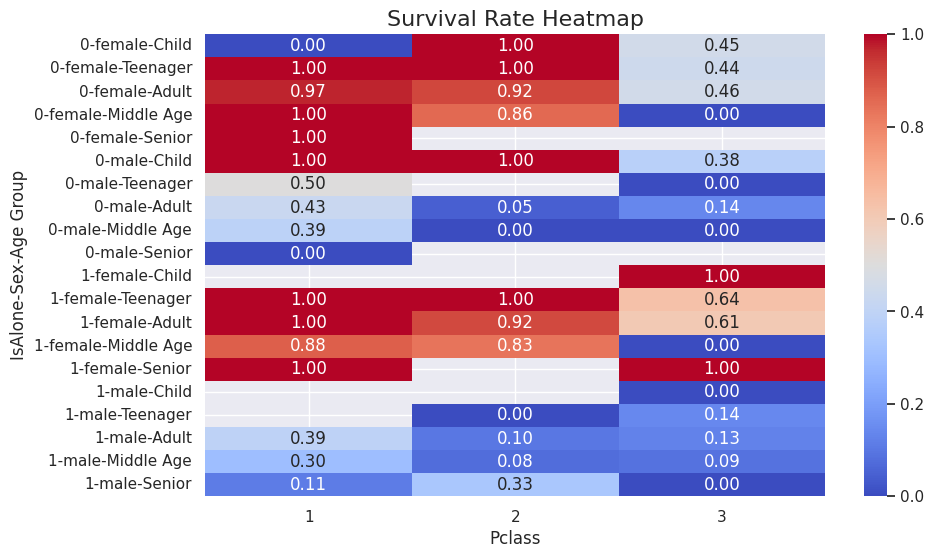

In [ ]:
#A heatmap visualizing survival
pivot = train_df.pivot_table(index=['IsAlone','Sex','Age Group'],
    columns='Pclass',
    values='Survived',
    aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Rate Heatmap',fontsize= 16)
plt.show()


**Model Evaluation**


In [ ]:
#splitting my data
X = train_df.drop(columns=['PassengerId','Survived','Name','Ticket'], axis=1)
Y = train_df['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,IsAlone,Age Group
0,3,male,22.0,1,0,7.2500,S,2,0,Adult
1,1,female,38.0,1,0,71.2833,C,2,0,Adult
2,3,female,26.0,0,0,7.9250,S,1,1,Adult
3,1,female,35.0,1,0,53.1000,S,2,0,Adult
4,3,male,35.0,0,0,8.0500,S,1,1,Adult


In [ ]:
Y.  head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#splitting into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
X.shape,X_train.shape, X_test.shape

((891, 10), (712, 10), (179, 10))

In [ ]:
Y.shape,Y_train.shape, Y_test.shape

((891,), (712,), (179,))

In [ ]:
#one-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'Age Group'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Age Group'], drop_first=True)

#model training
logistic_regression = LogisticRegression(max_iter = 1000)
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
xgboost = XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')

logistic_regression.fit(X_train_encoded, Y_train)
random_forest.fit(X_train_encoded, Y_train)
xgboost.fit(X_train_encoded, Y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:44:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
#model evaluation

models = {'Logistic Regression': logistic_regression,
          'Random Forest': random_forest,
          'XGBoost': xgboost}

for name, model in models.items():
    y_pred = model.predict(X_test_encoded)
    print(f"📊 {name}")
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("ROC AUC:", roc_auc_score(Y_test, model.predict_proba(X_test_encoded)[:,1]))
    print(classification_report(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))
    print("-"*50)

📊 Logistic Regression
Accuracy: 0.8268156424581006
ROC AUC: 0.8561264822134388
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

[[101   9]
 [ 22  47]]
--------------------------------------------------
📊 Random Forest
Accuracy: 0.8100558659217877
ROC AUC: 0.8266139657444005
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

[[95 15]
 [19 50]]
--------------------------------------------------
📊 XGBoost
Accuracy: 0.8044692737430168
ROC AUC: 0.

In [ ]:
#Ensemble for better accuracy
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', random_forest), ('xgb', xgboost)], voting='soft')
ensemble.fit(X_train_encoded, Y_train)
print("Ensemble Accuracy:", accuracy_score(Y_test, ensemble.predict(X_test_encoded)))
print("Ensemble ROC AUC:", roc_auc_score(Y_test, ensemble.predict_proba(X_test_encoded)[:,1]))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:12:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble Accuracy: 0.8156424581005587
Ensemble ROC AUC: 0.851646903820817


In [55]:
#MODEL PREDICTION
# Apply the same preprocessing steps to the test data as was done for the training data
X_test = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) # Drop Cabin column as well
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True) # Fill missing Fare values
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True) # Fill missing Embarked values

# Feature Engineering
X_test['Family Size'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test['IsAlone'] = (X_test['Family Size']==1).astype(int)

# Create Age bins
bins= [0,12,18,40,60,100]
labels = ['Child','Teenager','Adult','Middle Age','Senior']
X_test['Age Group'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

# One-hot encode categorical columns
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Age Group'], drop_first=True)

# Align columns - crucial for consistent feature sets
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
# Ensure the order of columns is the same
X_test_encoded = X_test_encoded[train_cols]


# Make predictions using the ensemble model
predictions = ensemble.predict(X_test_encoded)

# Create submission file
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


/tmp/ipython-input-2601851606.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
/tmp/ipython-input-2601851606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'